* **Soft binning function**
    * `f(x) = softmax((wx+b)/τ)`
    
   * with a continuous input variable x, 
   * Number of bins to bin input x (`W`): n+ 1.   
   (Value of which is treated as constant & are represented as: `w= [1,2,...,n+ 1]`)
   
   * Therefore `n` number of cut points required to bin in `n+1` bins are as : `[β1,β2,...,βn]`.   
   (These are trainable params & are represented as `b= [0,−β1,−β1−β2, ... , −β1−β2− ·· −βn]`)

In [65]:
import numpy as np

In [84]:
??np.arange
np.arange(start= 0, stop=1, step=0.3)#, dtype=np.float8)

array([0. , 0.3, 0.6, 0.9])

In [164]:
def bin_func(cut_pts, t=1, step_val=0.1):
    b= [0]
    #b.append(lambda x: b[idx]+val for idx, val in enumerate(cut_pts])
    [b.append((b[-1]-val)) for val in cut_pts];#prepares the list of n cutpoint values; format [0,-b1,-b1-b2] i.e., [0,-0.33,-0.99]
    
    w= list(range(1, len(cut_pts)+2))#list of n+1 bins; [1,2,3]
    x= np.arange(start= 0, stop=1, step=step_val)#input continuous values
    
    logits_arr= np.zeros((x.shape[0],len(w)))# shape is (num_inputs, num_bins)
    softmax_arr= np.zeros((x.shape[0],len(w)))
    for idx in range(x.shape[0]):
        logits_arr[idx] = [(w[num_cut]*x[idx] + b[num_cut])/t for num_cut in range(len(w))]
        softmax_arr[idx]= [np.exp(logits_arr[idx][num_cut])/sum(np.exp(logits_arr[idx])) for num_cut in range(len(w))]
    
    return logits_arr, softmax_arr
    

In [159]:
cut_pts=[0.33,0.66]
logits, softmax= bin_func(cut_pts, 1)

logits
#representative of 3 consecutive logit values; x, 2x-0.33, 3x-0.99 for 10 diff. values of x

array([[ 0.  , -0.33, -0.99],
       [ 0.1 , -0.13, -0.69],
       [ 0.2 ,  0.07, -0.39],
       [ 0.3 ,  0.27, -0.09],
       [ 0.4 ,  0.47,  0.21],
       [ 0.5 ,  0.67,  0.51],
       [ 0.6 ,  0.87,  0.81],
       [ 0.7 ,  1.07,  1.11],
       [ 0.8 ,  1.27,  1.41],
       [ 0.9 ,  1.47,  1.71]])

In [160]:
softmax

array([[0.47835436, 0.3439003 , 0.17774533],
       [0.44476499, 0.35338073, 0.20185428],
       [0.41111275, 0.36099623, 0.22789102],
       [0.37771448, 0.36655133, 0.25573419],
       [0.34489094, 0.36989835, 0.28521071],
       [0.31295427, 0.37094622, 0.31609951],
       [0.28219551, 0.36966608, 0.34813841],
       [0.25287312, 0.36609317, 0.38103371],
       [0.22520364, 0.36032451, 0.41447185],
       [0.19935508, 0.35251303, 0.44813189]])

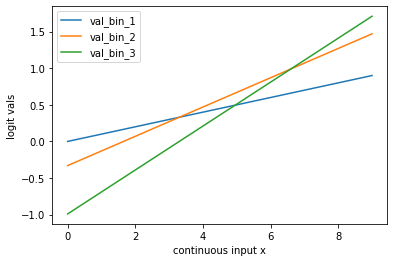

In [127]:
import matplotlib.pyplot as plt

plt.plot(logits[:,0])
plt.plot( logits[:,1])
plt.plot( logits[:,2])
plt.xlabel('continuous input x')
plt.ylabel('logit vals')

plt.legend(['val_bin_1','val_bin_2','val_bin_3'], loc= 'upper left')

* plotting softmax

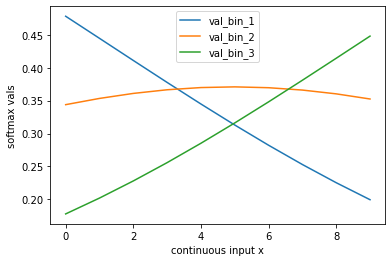

In [157]:
plt.plot(softmax[:,0])
plt.plot(softmax[:,1])
plt.plot(softmax[:,2])
plt.xlabel('continuous input x')
plt.ylabel('softmax vals')

plt.legend(['val_bin_1','val_bin_2','val_bin_3'], loc= 'upper center')

* With varying values of tempt factor(t)

In [189]:
cut_pts=[0.33,0.66]
logits_b, softmax_b= bin_func(cut_pts, t=0.01, step_val=0.01)


logits_b[:10]
#representative of 3 consecutive logit values; x, 2x-0.33, 3x-0.99 for 10 diff. values of x

array([[  0., -33., -99.],
       [  1., -31., -96.],
       [  2., -29., -93.],
       [  3., -27., -90.],
       [  4., -25., -87.],
       [  5., -23., -84.],
       [  6., -21., -81.],
       [  7., -19., -78.],
       [  8., -17., -75.],
       [  9., -15., -72.]])

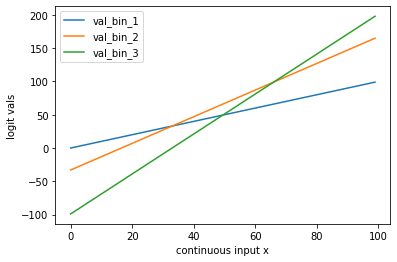

In [190]:
plt.plot(logits_b[:,0])#, logits[:,2])
plt.plot( logits_b[:,1])
plt.plot( logits_b[:,2])
plt.xlabel('continuous input x')
plt.ylabel('logit vals')

plt.legend(['val_bin_1','val_bin_2','val_bin_3'], loc= 'upper left')

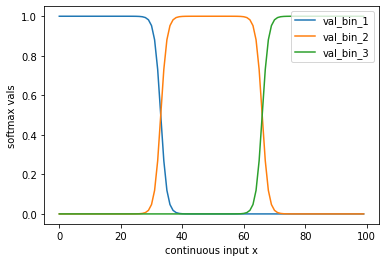

In [192]:
plt.plot(softmax_b[:,0])#, logits[:,2])
plt.plot(softmax_b[:,1])
plt.plot(softmax_b[:,2])
plt.xlabel('continuous input x')
plt.ylabel('softmax vals')

plt.legend(['val_bin_1','val_bin_2','val_bin_3'], loc= 'upper right')

* `mlsquare/layers/keras` module